In [1]:
### Biofilm formation assay: quantification of biofilm production via crystal violet
# The script is designed to handle the data that the spectrophotometer generates, in order to evaluate the biofilm production of 
# PPK a microbial model community composed of three bacterial species.
# The data will be used to generate a line plot of the biofilm production along the time points for each of the treatments
# Also a box plot for a given time point and the statistical analysis to sdetermine if the biofilm production is statistically different
# among the treatments, with the option to use a parametric or a non parametric analysis depending on the nature of the data.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#relative path
relative_path = 'ppk_biofilm.csv'
# Load the csv data 
df1 = pd.read_csv(relative_path, delimiter=';')
df1
# Abouth the data: estimation of biofilm formation
# Absorvance at OD590 for members of the PPK community, quantified at 5 different time points (day 1 to day 5) 
# for the single cultures: Pao1, KP1, PF5, all the 2 by 2 combinatios, and the triple culture.


,Culture,1,2,3,4,5,6,7,8,Day
0,Pao1,"0,4552","0,2997","0,2464","0,2532","0,2509","0,2672","0,2678","0,4056",1
1,KP1,"0,082","0,0947","0,0934","0,0959","0,0892","0,0873","0,1005","0,1267",1
2,PF5,"0,2789","0,2489","0,1765","0,2458","0,254","0,1434","0,2572","0,2718",1
3,Pao1_KP1,"1,0841","0,3991","0,4593","0,3691","0,3719","0,3884","0,3444","0,4856",1
4,Pao1_KP1,"0,686","0,9119","0,4577","0,3745","0,458","0,9149","0,5206","0,595",1
5,Pao1_PF5,"0,6131","0,4359","0,3183","0,2856","0,3063","0,3315","0,3094","0,3697",1
6,Pao1_PF5,"0,4954","0,4228","0,2993","0,2508","0,2574","0,255","0,2184","0,2926",1
7,KP1_PF5,"0,3633","0,3768","0,1863","0,1374","0,1486","0,2324","0,1942","0,1865",1
8,TC,"0,9136","0,5436","0,3748","0,3294","0,3289","0,2858","0,2934","0,4373",1
9,TC,"0,7967","0,8567","0,3405","0,2955","0,3106","0,3127","0,3347","0,3396",1


In [3]:
#change the decimal separator from ',' to '.' so the numbers with decimals will be recognized as such

df1['1'] = df1['1'].str.replace(',', '.').astype(float)
df1['2'] = df1['2'].str.replace(',', '.').astype(float)
df1['3'] = df1['3'].str.replace(',', '.').astype(float)
df1['4'] = df1['4'].str.replace(',', '.').astype(float)
df1['5'] = df1['5'].str.replace(',', '.').astype(float)
df1['6'] = df1['6'].str.replace(',', '.').astype(float)
df1['7'] = df1['7'].str.replace(',', '.').astype(float)
df1['8'] = df1['8'].str.replace(',', '.').astype(float)


In [4]:
df1

,Culture,1,2,3,4,5,6,7,8,Day
0,Pao1,0.4552,0.2997,0.2464,0.2532,0.2509,0.2672,0.2678,0.4056,1
1,KP1,0.0820,0.0947,0.0934,0.0959,0.0892,0.0873,0.1005,0.1267,1
2,PF5,0.2789,0.2489,0.1765,0.2458,0.2540,0.1434,0.2572,0.2718,1
3,Pao1_KP1,1.0841,0.3991,0.4593,0.3691,0.3719,0.3884,0.3444,0.4856,1
4,Pao1_KP1,0.6860,0.9119,0.4577,0.3745,0.4580,0.9149,0.5206,0.5950,1
5,Pao1_PF5,0.6131,0.4359,0.3183,0.2856,0.3063,0.3315,0.3094,0.3697,1
6,Pao1_PF5,0.4954,0.4228,0.2993,0.2508,0.2574,0.2550,0.2184,0.2926,1
7,KP1_PF5,0.3633,0.3768,0.1863,0.1374,0.1486,0.2324,0.1942,0.1865,1
8,TC,0.9136,0.5436,0.3748,0.3294,0.3289,0.2858,0.2934,0.4373,1
9,TC,0.7967,0.8567,0.3405,0.2955,0.3106,0.3127,0.3347,0.3396,1


In [5]:
# data points with more than 3 times the standar deviation away from the mean will be removed using z scores

z_scores = np.abs(stats.zscore(df1.iloc[:, 1:-1]))  # Exclude the first and last columns
threshold = 3 # three times the SD from the mean value
outliers = np.where(z_scores > threshold)
df1_cleaned = df1.drop(outliers[0])
df1_cleaned

,Culture,1,2,3,4,5,6,7,8,Day
0,Pao1,0.4552,0.2997,0.2464,0.2532,0.2509,0.2672,0.2678,0.4056,1
1,KP1,0.0820,0.0947,0.0934,0.0959,0.0892,0.0873,0.1005,0.1267,1
2,PF5,0.2789,0.2489,0.1765,0.2458,0.2540,0.1434,0.2572,0.2718,1
3,Pao1_KP1,1.0841,0.3991,0.4593,0.3691,0.3719,0.3884,0.3444,0.4856,1
5,Pao1_PF5,0.6131,0.4359,0.3183,0.2856,0.3063,0.3315,0.3094,0.3697,1
6,Pao1_PF5,0.4954,0.4228,0.2993,0.2508,0.2574,0.2550,0.2184,0.2926,1
7,KP1_PF5,0.3633,0.3768,0.1863,0.1374,0.1486,0.2324,0.1942,0.1865,1
8,TC,0.9136,0.5436,0.3748,0.3294,0.3289,0.2858,0.2934,0.4373,1
9,TC,0.7967,0.8567,0.3405,0.2955,0.3106,0.3127,0.3347,0.3396,1
10,TC,1.0215,0.6011,0.3803,0.3569,0.3648,0.3586,0.4024,0.4270,1


In [6]:
#Calculate the mean and standar deviation for each culture treatmend and day
means = df1_cleaned.groupby(['Culture', 'Day']).mean()
stds = df1_cleaned.groupby(['Culture', 'Day']).std()

In [7]:
# organize the data in a 'unidimensional way', that is to say for each row just one absorvance value
melted_df1 = pd.melt(df1_cleaned, id_vars=['Culture', 'Day'], var_name='Replicate', value_name='Value')
melted_df1

,Culture,Day,Replicate,Value
0,Pao1,1,1,0.4552
1,KP1,1,1,0.0820
2,PF5,1,1,0.2789
3,Pao1_KP1,1,1,1.0841
4,Pao1_PF5,1,1,0.6131
...,...,...,...,...
451,KP1_PF5,5,8,0.1411
452,TC,5,8,0.2170
453,TC,5,8,0.2787
454,TC,5,8,0.3616


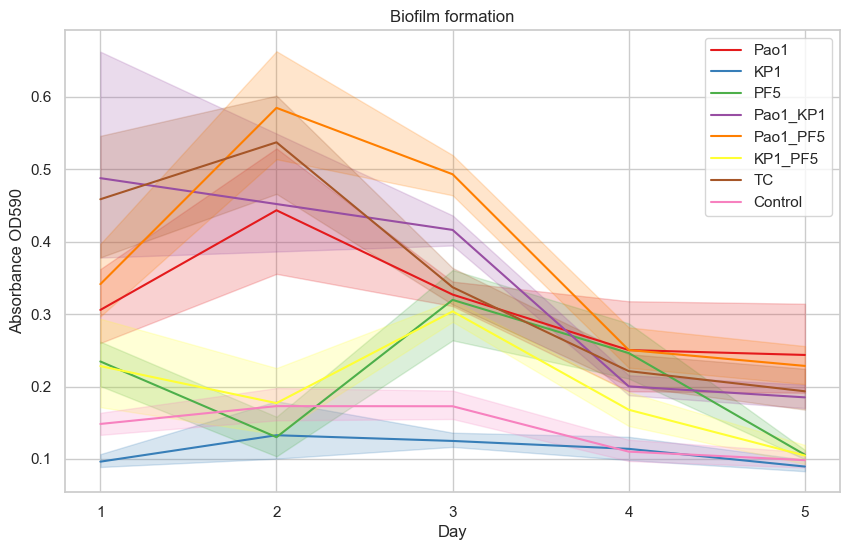

<Figure size 640x480 with 0 Axes>

In [14]:
# Plot the biofilm formation overtime
#seaborn is giving some strange warningns, but the code is working, so ignore the warningns with this usefull code:
import warnings

# Suppress seaborn warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

#### Constructing the figuere: 
plt.figure(figsize=(10, 6))
sns.set_palette("Set1") #sellect the colour palette

treatments = melted_df1['Culture'].unique()

# Plot absorvance values for each day (x axes) but separated by treatment (column Culture)
for treatment in treatments:
    data = melted_df1[melted_df1['Culture'] == treatment]
    sns.lineplot(data=data, x='Day', y='Value', label=treatment)

plt.xlabel('Day')
plt.ylabel('Absorbance OD590')
plt.title('Biofilm formation')
plt.xticks([1, 2, 3, 4, 5])
plt.legend()
plt.show()

# Save the figure
plt.savefig('Biofilm_production.png', dpi=300, bbox_inches='tight')

# Restore warnings to their default behavior (optional)
warnings.resetwarnings()

In [9]:
####### this is for saving the figure as a .png file in the computer ########

# Suppress seaborn warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

#Use the Agg backend for saving figures
import matplotlib
matplotlib.use('Agg')  # Use the Agg backend for saving figures


# Your seaborn code here

# Constructing the figure
plt.figure(figsize=(10, 6))
sns.set_palette("Set1")

# Assuming 'Culture' is the column containing treatment names
treatments = melted_df1['Culture'].unique()

for treatment in treatments:
    data = melted_df1[melted_df1['Culture'] == treatment]
    sns.lineplot(data=data, x='Day', y='Value', label=treatment)

plt.xlabel('Day')
plt.ylabel('Absorbance OD590')
plt.title('Biofilm formation')
plt.xticks([1, 2, 3, 4, 5])
plt.legend()

# Save the figure
plt.savefig('Biofilm_production1.png', dpi=300, bbox_inches='tight')

# Close the figure
plt.close()


# Restore warnings to their default behavior (optional)
warnings.resetwarnings()

In [10]:
# Check if the data has a normal distribution

from scipy.stats import shapiro

# Shapiro test
shapiro_test_statistic, shapiro_p_value = shapiro(melted_df1['Value'])

if shapiro_p_value < 0.05:
    print("The data is not normally distributed.")
else:
    print("The data appears to be normally distributed.")

The data is not normally distributed.


In [11]:
### statistical analysis ###
#you have two options: normal distribution go for one-way anova; no normal distribution go for Kruskal. See below:

from scipy.stats import f_oneway
from scipy.stats import kruskal
from scikit_posthocs import posthoc_dunn
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison


# Separate the data for each timepoint (Day)
timepoints = melted_df1['Day'].unique()
for day in timepoints:
    # Filter the data for the current timepoint
    day_data = melted_df1[melted_df1['Day'] == day]
    
    # Create a dictionary to store treatment groups
    treatment_groups = {}
    
    # Iterate through treatments and create groups
    for treatment in day_data['Culture'].unique():
        treatment_groups[treatment] = day_data[day_data['Culture'] == treatment]['Value']
    
    # one-way ANOVA test if the data has a normal distribution
    f_statistic, p_value = f_oneway(*treatment_groups.values())
    
    # Perform a Kruskal-Wallis test, if the data doesn't have a normal distribution
    #h_statistic, p_value = kruskal(*treatment_groups)
    
    # Step 5: Report the results
    print(f"Timepoint (Day) {day}:")
    print(f"F-statistic: {f_statistic}")
    print(f"P-value: {p_value}")
    
    # Check for significance (e.g., using a significance level of 0.05)
    if p_value < 0.05:
        print("Statistically significant differences exist among treatments.")
        
        # Perform Tukey's HSD post hoc test if you used one-way ANOVA
        mc = MultiComparison(melted_df1['Value'], melted_df1['Culture'])
        result = mc.tukeyhsd()
        print(result)
        
        # Perform Dunn's test if you used Kruskal
        #dunn_result = posthoc_dunn(df, val_col='Value', group_col='Culture')
        #print(dunn_result)
    
    else:
        print("No statistically significant differences among treatments.")
    print("\n")

Timepoint (Day) 1:
F-statistic: 9.325865919914822
P-value: 2.134265701072524e-08
Statistically significant differences exist among treatments.
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
 Control      KP1   -0.029  0.985 -0.1262 0.0681  False
 Control  KP1_PF5   0.0559  0.654 -0.0413  0.153  False
 Control      PF5   0.0668 0.4213 -0.0304  0.164  False
 Control     Pao1   0.1735    0.0  0.0764 0.2707   True
 Control Pao1_KP1   0.1582    0.0  0.0682 0.2482   True
 Control Pao1_PF5   0.2392    0.0   0.155 0.3233   True
 Control       TC    0.209    0.0  0.1297 0.2884   True
     KP1  KP1_PF5   0.0849 0.1377 -0.0123 0.1821  False
     KP1      PF5   0.0958 0.0565 -0.0014  0.193  False
     KP1     Pao1   0.2026    0.0  0.1054 0.2997   True
     KP1 Pao1_KP1   0.1872    0.0  0.0973 0.2772   True
     KP1 Pao1_PF5   0.2682    0.0   0.184 0.3524   True
     KP1       TC

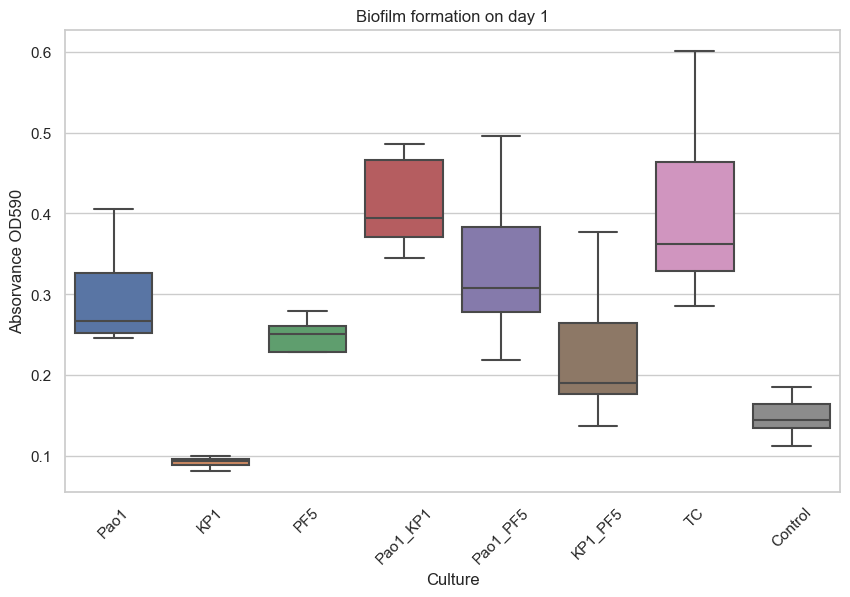

In [12]:
#create a box plot figure for the values of each culture treatment in a specific time point
%matplotlib inline
# Suppress seaborn warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Set the style for the plots (optional)
sns.set(style="whitegrid")

# Specify the day you want to plot (e.g., Day 1)
desired_day = 1

# Filter the data for the desired day
day1_data = melted_df1[melted_df1['Day'] == desired_day]

#colours 
custom_palette = sns.color_palette("Set1")

# Create a box plot of values for each treatment on Day 1
plt.figure(figsize=(10, 6))
sns.boxplot(x='Culture', y='Value', data=day1_data, showfliers=False) #snowfliers= false to get rid of the outliers inside the group 'Day'
plt.xlabel('Culture')
plt.ylabel('Absorvance OD590')
plt.title(f'Biofilm formation on day {desired_day}')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

# Restore warnings to their default behavior (optional)
warnings.resetwarnings()

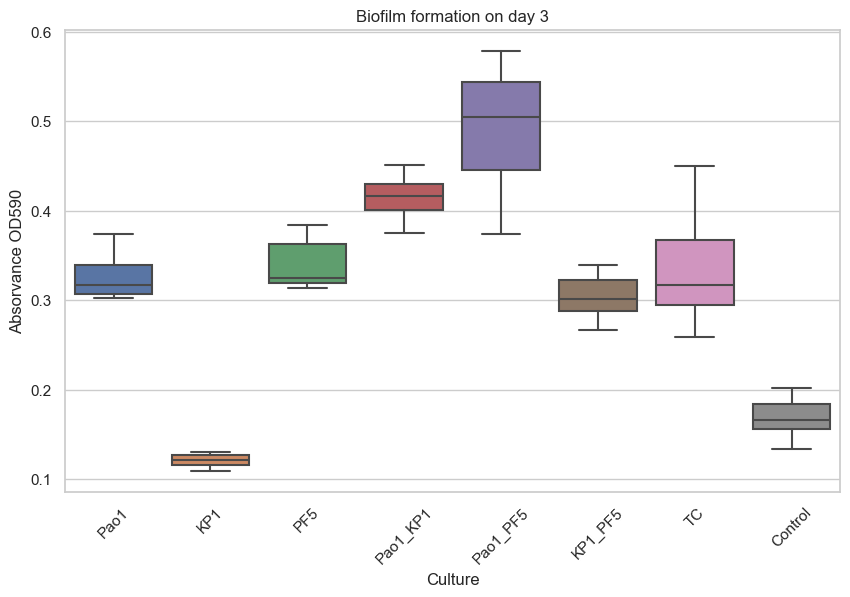

In [13]:
%matplotlib inline
# Suppress seaborn warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Set the style for the plots (optional)
sns.set(style="whitegrid")

# Specify the day you want to plot (e.g., Day 1)
desired_day = 3

# Filter the data for the desired day
day3_data = melted_df1[melted_df1['Day'] == desired_day]

#colours 
custom_palette = sns.color_palette("Set3", 10)

# Create a box plot of values for each treatment on Day 3
plt.figure(figsize=(10, 6))
sns.boxplot(x='Culture', y='Value', data=day1_data, showfliers=False) #snowfliers= false to get rid of the outliers inside the group 'Day'
plt.xlabel('Culture')
plt.ylabel('Absorvance OD590')
plt.title(f'Biofilm formation on day {desired_day}')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

# Restore warnings to their default behavior (optional)
warnings.resetwarnings()

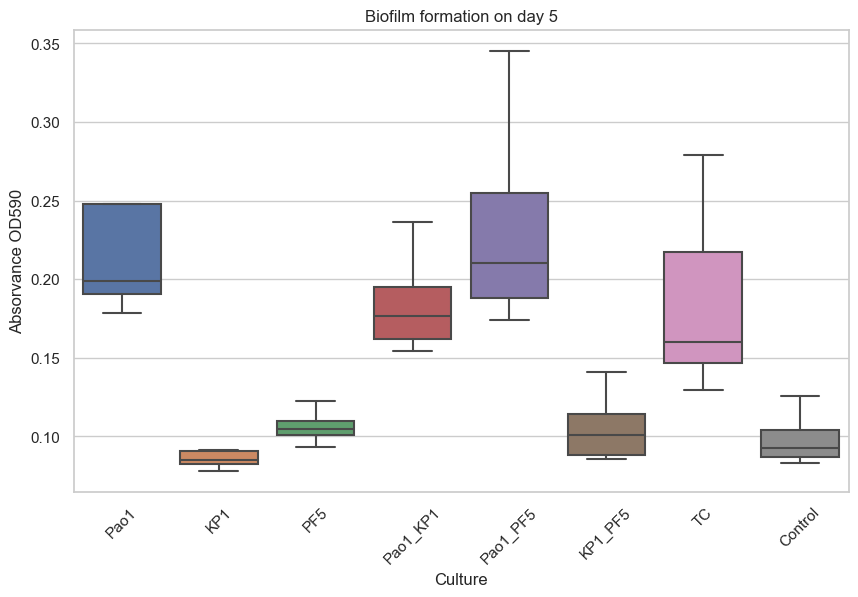

In [15]:
%matplotlib inline
# Suppress seaborn warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Set the style for the plots (optional)
sns.set(style="whitegrid")

# Specify the day you want to plot (e.g., Day 5)
desired_day = 5

# Filter the data for the desired day
day5_data = melted_df1[melted_df1['Day'] == desired_day]

#colours 
custom_palette = sns.color_palette("Set3", 10)

# Create a box plot of values for each treatment on Day 3
plt.figure(figsize=(10, 6))
sns.boxplot(x='Culture', y='Value', data=day5_data, showfliers=False) #snowfliers= false to get rid of the outliers inside the group 'Day'
plt.xlabel('Culture')
plt.ylabel('Absorvance OD590')
plt.title(f'Biofilm formation on day {desired_day}')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

# Restore warnings to their default behavior (optional)
warnings.resetwarnings()